<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday19072022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This week is basically an exploration of the dataset. Sorry there are
no pretty visuals generated!

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
from matplotlib.lines import Line2D

!pip install country_converter --upgrade
import country_converter as coco

!pip install colour
import colour
from matplotlib.colors import ListedColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Palette from MetBrewer
!wget 'https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py'
import palettes as met

--2022-07-20 02:32:15--  https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py [following]
--2022-07-20 02:32:16--  https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11849 (12K) [text/plain]
Saving to: ‘palettes.py’

palettes.py         100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-07-20 02:32:16 (69.0 MB/s) - ‘palettes.py’ saved [11849/11849]



In [3]:
# Font
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-07-20 02:32:17--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-07-20 02:32:17--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.07s   

2022-07-20 02:32:18 (22.7 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [184]:
# Data

df = pd.read_csv('https://github.com/rfordatascience/tidytuesday/\
blob/master/data/2022/2022-07-19/technology.csv?raw=true')
cc = coco.CountryConverter()
namelist = cc.convert(names = list(df.iso3c.unique()), 
                      to = 'name_short',
                      not_found=None)
repdict = dict()
for i in range(len(list(df.iso3c.unique()))):
  repdict[list(df.iso3c.unique())[i]] = namelist[i]  # dict to replace

df['country'] = df.iso3c.replace(repdict)

In [233]:
# Selections
dftransact = df[(df['label'] == 'Value of credit or debit card transactions (USD)')][['country', 'year', 'value']].reset_index(drop=True)
dftransact = dftransact.groupby(['country', 'year']).first().rename(columns={'value': 'Value of credit or debit card transactions (USD)'})
#dfdepress = df[(df['label'] == 'N06A-Antidepressants (defined daily dosage)')][['country', 'year', 'value']].reset_index(drop=True).groupby(['country', 'year']).first()

#test = pd.concat([dfdepress, dftransact])

selection = dftransact

labels = list(df.label.unique())  # inspect labels

selectedlabels = [#'Value of credit or debit card transactions (USD)',
                  'N06A-Antidepressants (defined daily dosage)',
                  #'Land planted forest area 1000 ha',
                  #'Total vehicles (OICA)',
                  'Beds for those seeking in-patient acute care',
                  #'Weight of artificial fibers in spindles',
                  #'Items mailed or received',
                  #'People with internet access',
                  #'G03-Sex hormones and modulators of the genital system (defined daily dosage)',
                  'Thousands of passenger journeys by railway',
                  #'Newspaper copies circulated daily',
                  'Cellular subscriptions',
                  #'Visitor beds (hotels, etc.)',
                  #'% children who received a measles immunization',
                  #'% Irrigated area as a share of cultivated land',
                  ]

for label in selectedlabels:  # reorganise by labels
  added = df[(df['label'] == label)][['country', 'year', 'value']].reset_index(drop=True).groupby(['country', 'year']).first().rename(columns={'value': label})
  #selection = pd.concat([selection, added])
  selection = selection.merge(added, left_index=True, right_index=True, how='outer')

# See the correlation between each pair of tech labels
selection.corr()

,Value of credit or debit card transactions (USD),N06A-Antidepressants (defined daily dosage),Beds for those seeking in-patient acute care,Thousands of passenger journeys by railway,Cellular subscriptions
Value of credit or debit card transactions (USD),1.000000,0.666377,NaN,NaN,0.691367
N06A-Antidepressants (defined daily dosage),0.666377,1.000000,0.770650,NaN,0.853321
Beds for those seeking in-patient acute care,NaN,0.770650,1.000000,0.366237,0.375927
Thousands of passenger journeys by railway,NaN,NaN,0.366237,1.000000,0.019109
Cellular subscriptions,0.691367,0.853321,0.375927,0.019109,1.000000


In [188]:
# Inspect labels
labels

['% children who received a BCG immunization',
 '% children who received a DPT immunization',
 '% children who received a hepb3 immunization',
 '% children who received a Hib3 immunization',
 '% children who received a IPV1 immunization',
 '% children who received a MCV1 immunization',
 '% children who received a MCV2 immunization',
 '% children who received a PCV3 immunization',
 '% children who received a Pol3 immunization',
 '% children who received a RCV1 immunization',
 '% children who received a rotac immunization',
 '% children who received a YFV immunization',
 'Combine harvesters - threshers in use',
 'Land agricultural land area 1000 ha',
 'Milking machines in use',
 'Agricultural tractors in use',
 'Total vehicles (OICA)',
 'Aluminum primary production, in metric tons',
 'Land arable land area 1000 ha',
 'ATMs',
 'Air transport, passengers carried',
 'Civil aviation passenger-KM traveled',
 'Civil aviation ton-KM of cargo carried',
 'Beds for those seeking in-patient acute c

In [234]:
# Debunk the multiaxes
selection = selection.reset_index()

In [235]:
selection

,country,year,Value of credit or debit card transactions (USD),N06A-Antidepressants (defined daily dosage),Beds for those seeking in-patient acute care,Thousands of passenger journeys by railway,Cellular subscriptions
0,Afghanistan,1960,NaN,NaN,NaN,NaN,0.000000e+00
1,Afghanistan,1965,NaN,NaN,NaN,NaN,0.000000e+00
2,Afghanistan,1970,NaN,NaN,NaN,NaN,0.000000e+00
3,Afghanistan,1975,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,1976,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...
14259,Zimbabwe,2016,NaN,NaN,NaN,NaN,1.254339e+07
14260,Zimbabwe,2017,NaN,NaN,NaN,NaN,1.372949e+07
14261,Zimbabwe,2018,NaN,NaN,NaN,NaN,1.260306e+07
14262,Zimbabwe,2019,NaN,NaN,NaN,NaN,1.288316e+07


In [240]:
# Pick countries to compare
countries = selection.country.unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'CSK',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo Republic', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indone

In [243]:
countries = [#'United States',
             #'India',
             'France',
             #'United Kingdom',
             'Spain',
             'Denmark',
             'Norway',
             'Sweden',
             'Finland',
             'Iceland',
             #'China'
             ]

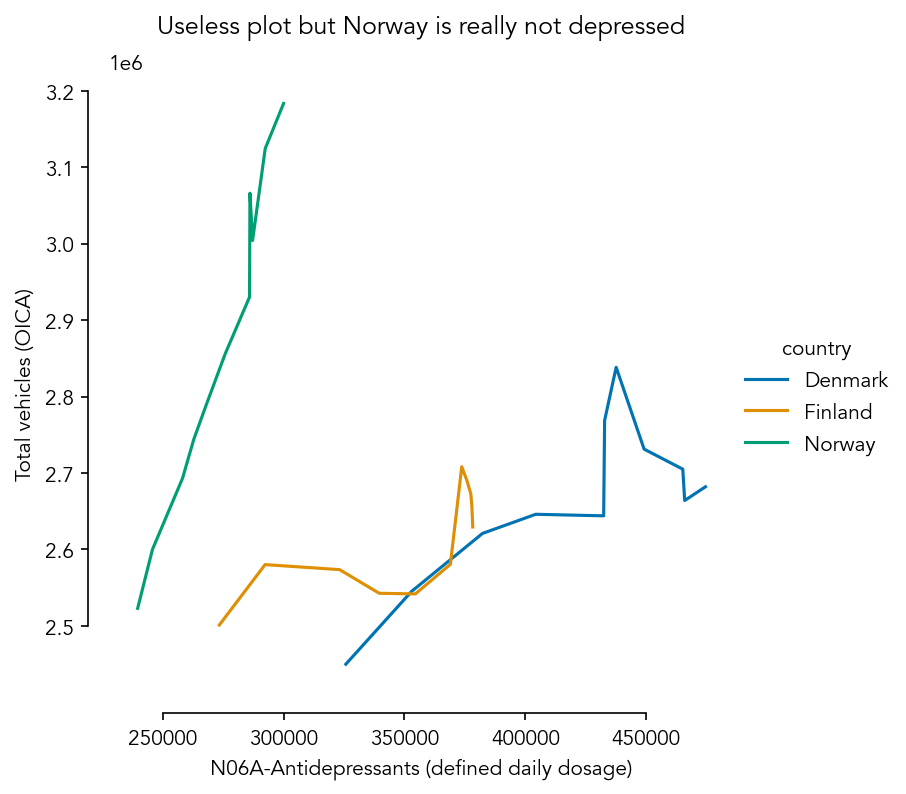

In [227]:
# Plotting

plt.rcParams['figure.figsize']=(9,9)
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.facecolor']='w'

# Cmap
colorlist = met.met_brew(name="Morgenstern", 
                      #n=len(dfd.columns), 
                      n=2*len(selection.country.unique()),
                      brew_type="continuous")[::-1] #cmap

snslist = sns.color_palette(colorlist[: len(countries)])

cmap = ListedColormap(sns.color_palette(colorlist[:]).as_hex())

# Generic
g = sns.relplot(
    data=selection[selection['country'].isin(countries)],
    x='N06A-Antidepressants (defined daily dosage)', 
    y="Total vehicles (OICA)",
    hue="country", #size="", 
    #col="year",
    kind="line", 
    palette='colorblind',#snslist,
    #height=5, 
    #aspect=.75, 
    facet_kws=dict(sharex=False),
    #legend=False,
)

#g.set(xscale="log")
#g.set(yscale="log")

sns.despine(trim=True,
            offset=10)

#g.set_xticklabels(rotation=90)

plt.title('Useless plot but Norway is really not depressed\n')

plt.show()

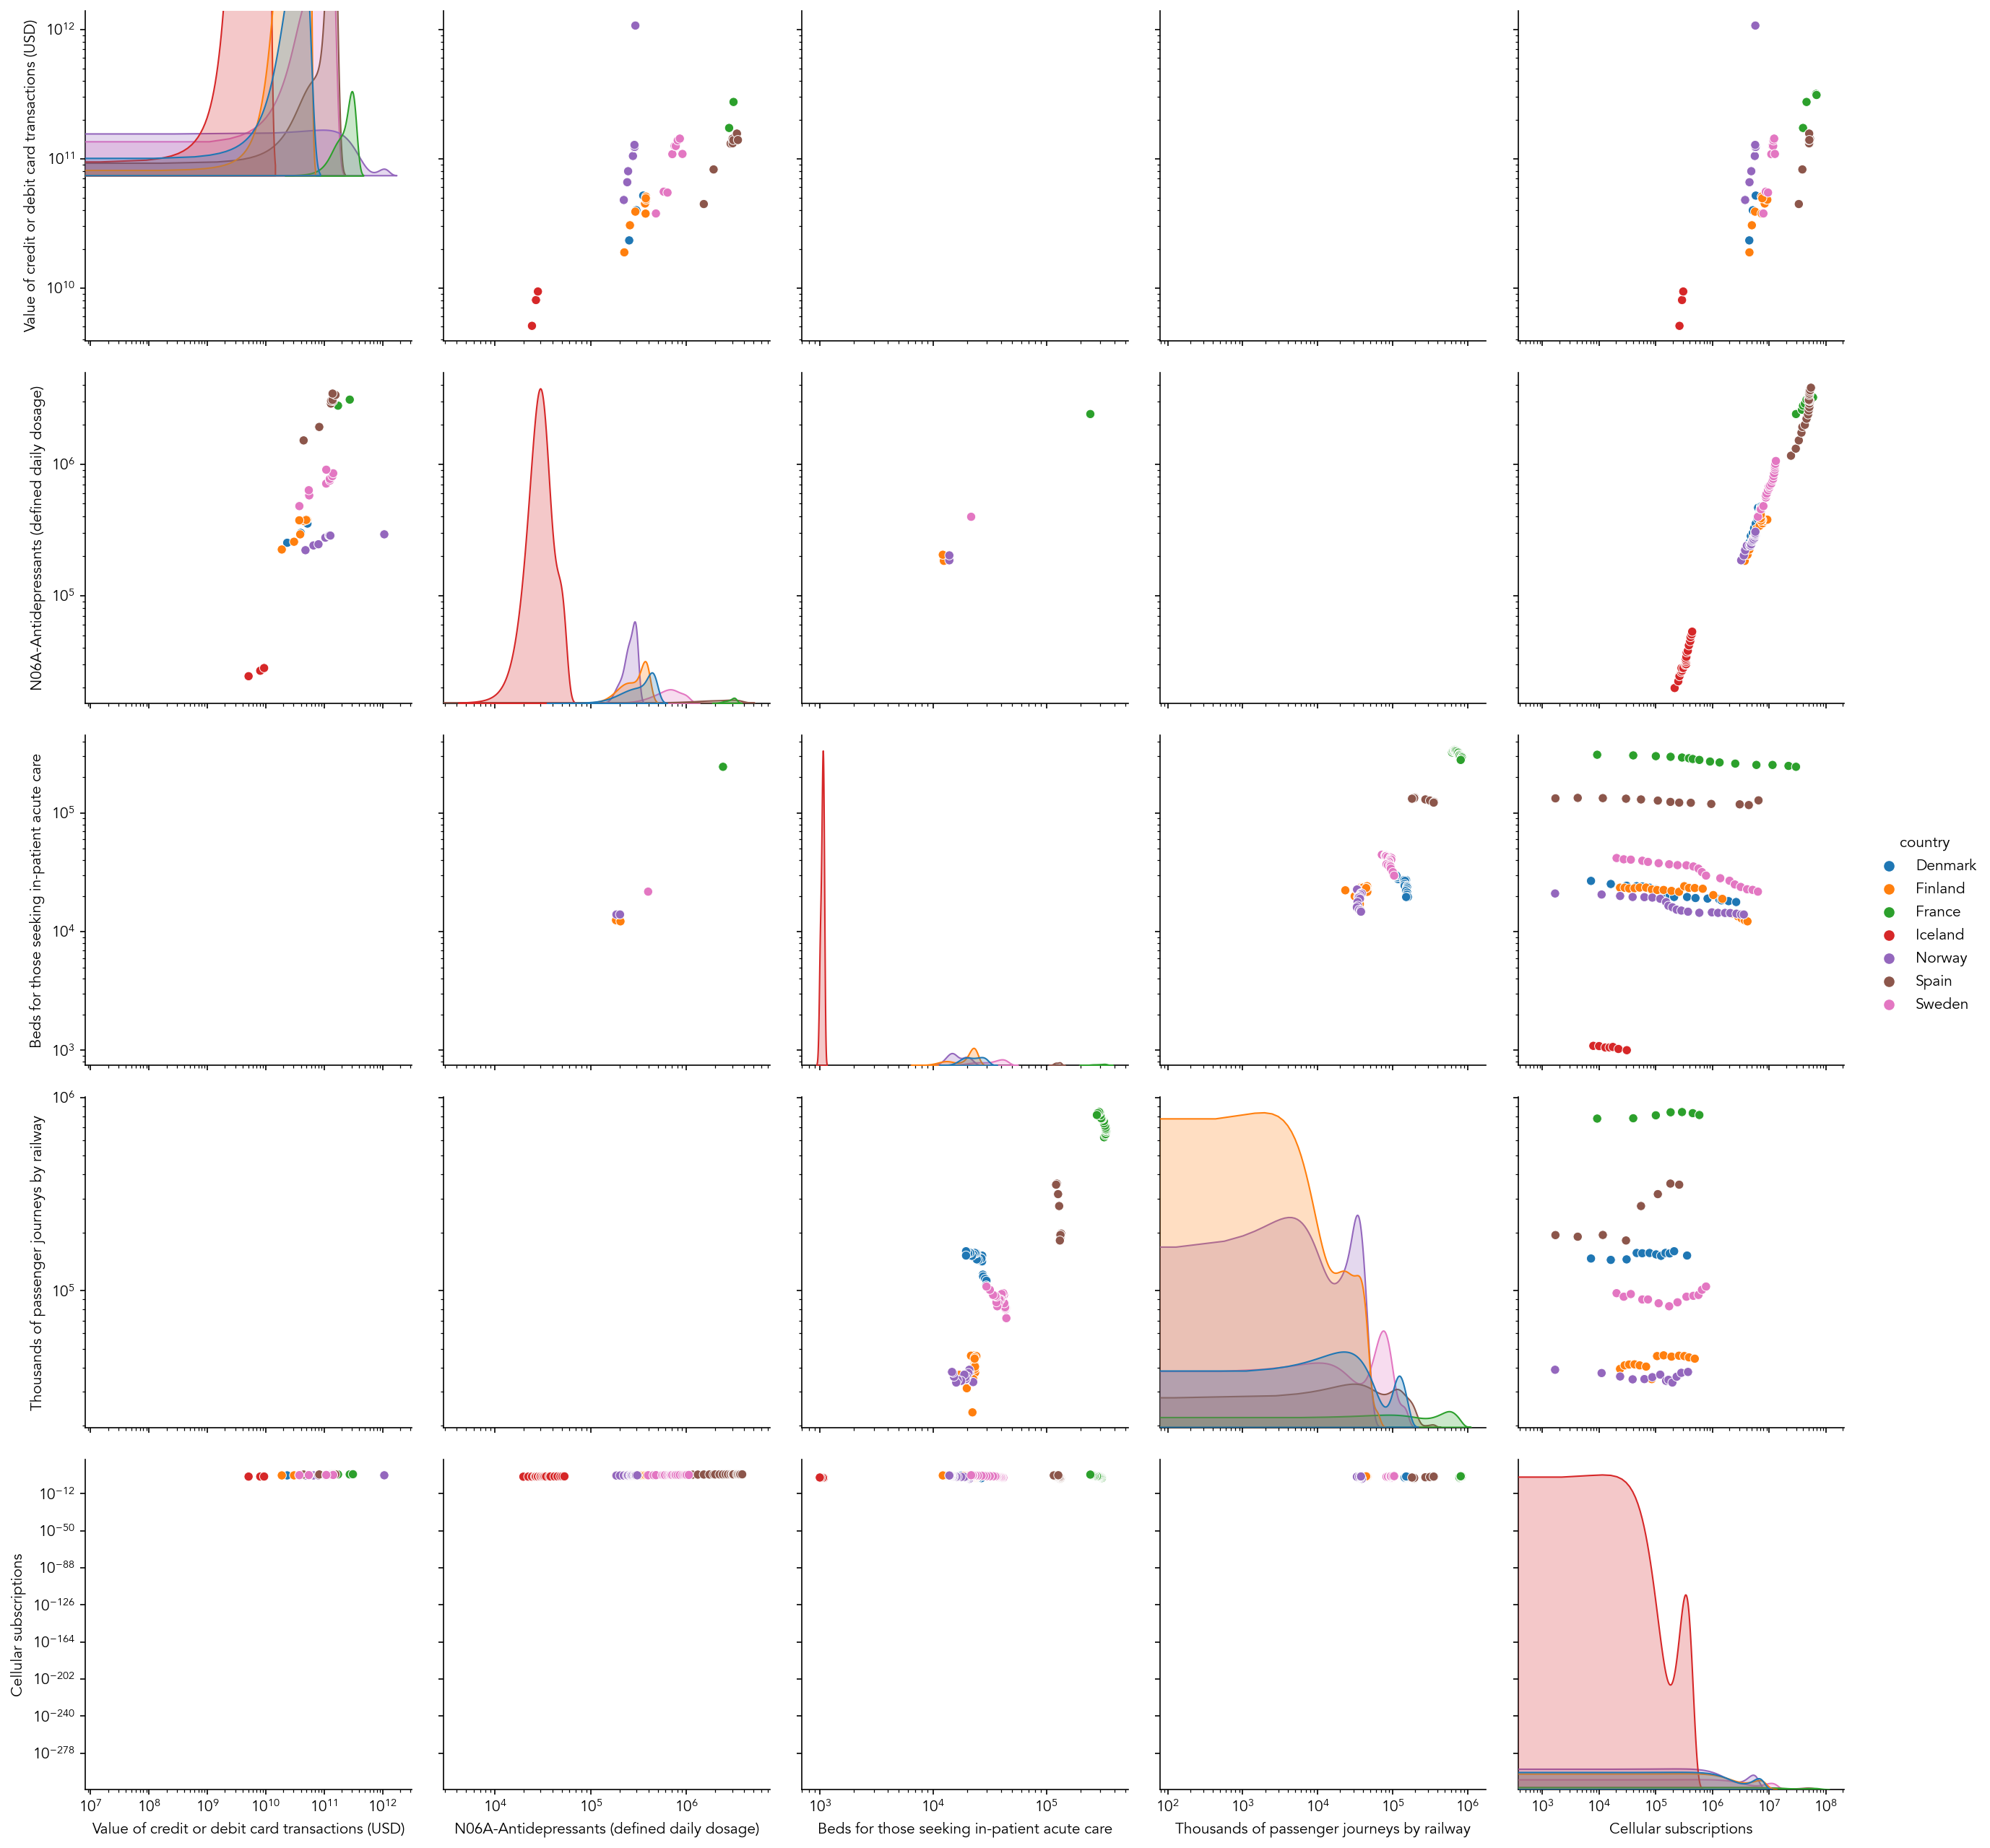

In [246]:
# Pair plot?

p = sns.pairplot(selection[selection['country'].isin(countries)].drop('year', axis=1),
                 hue='country',
                 height=3.5)

p.set(xscale="log")
p.set(yscale="log")

plt.show()

In [55]:
# NOT FUNCTIONING DON'T RUN
# New df for correlation analysis

new = pd.DataFrame()  # reconstruct the data
struct = df.groupby(['country', 'year']).first().reset_index()

new['country'] = struct['country']
new['year'] = struct.year

labels = list(df.label.unique())  # inspect labels

selectedlabels = ['Value of credit or debit card transactions (USD)',
                  'N06A-Antidepressants (defined daily dosage)',
                  'Land planted forest area 1000 ha',
                  'Total vehicles (OICA)',
                  'Beds for those seeking in-patient acute care',
                  'Weight of artificial fibers in spindles',]
for label in selectedlabels:  # reorganise by labels
  values = df[(df['label'] == label)]['value'].rename(label).reset_index(drop=True)
  new = pd.concat([new, values], axis=1)

#new = new.dropna()